In [ ]:
#############################################################################################

In [236]:
import os 
import nltk 
import re
import string
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn import cross_validation,linear_model
from collections import Counter
import warnings # Stop deprecation warnings from being printed
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords 
os.chdir('E:/VINOD KUMAR/OMEGA_PROJECT_NLP')
from sklearn.svm import LinearSVC

In [199]:
#############################################################################################

In [200]:
os.getcwd()

'E:\\VINOD KUMAR\\OMEGA_PROJECT_NLP'

In [201]:
os.listdir('E:\\VINOD KUMAR\\OMEGA_PROJECT_NLP')

['COMPLETE_FLOW_PROJECT_REPORT.xlsx',
 'Guliford June 1-25, 2018.xlsx',
 'IPM June1-17, 2018.xlsx',
 'rtfConverter.py',
 'Test Data',
 'Train Data',
 'Train_data_Guliford Jan,2017 -May,2018.xlsx',
 'Train_data_IPM Jan,2017-May,2018.xlsx']

In [202]:
os.listdir('E:/VINOD KUMAR/OMEGA_PROJECT_NLP/Train Data')

['Train_data_Guliford Jan,2017 -May,2018.xlsx',
 'Train_data_IPM Jan,2017-May,2018.xlsx']

In [203]:
# read the files if exists in working directory
if (os.path.exists("Train_data_IPM Jan,2017-May,2018.xlsx"))==True & (os.path.exists("IPM June1-17, 2018.xlsx"))==True:
    print("Train,Test data exists reading as dataframe")
    #print("Files in directory are:",os.listdir(cwd))
    #reading training data into a dataframe using pandas
    actual_data=pd.read_excel("Train_data_IPM Jan,2017-May,2018.xlsx")
    test_data=pd.read_excel("IPM June1-17, 2018.xlsx")
    print(actual_data.shape,test_data.shape)
else: 
    print("file not exists")
    print("Files in directory are:",os.listdir(cwd))

Train,Test data exists reading as dataframe
(130535, 7) (4882, 7)


In [204]:
##########################################################################################

In [205]:
print(actual_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130535 entries, 0 to 130534
Data columns (total 7 columns):
tran_id                 130535 non-null int64
tran_date               130535 non-null object
forwhom_id              130535 non-null int64
schedule_note           130500 non-null object
Categories1             130535 non-null object
Sub_categories1         130535 non-null object
Previous_Appointment    130535 non-null object
dtypes: int64(2), object(5)
memory usage: 7.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 7 columns):
tran_id                 4882 non-null int64
tran_date               4882 non-null datetime64[ns]
forwho_id               4882 non-null int64
schedule_note           4877 non-null object
Categories1             4882 non-null object
Sub_categories1         4882 non-null object
Previous_Appointment    4882 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 267.1+ KB
None


In [206]:
#################################################################################################

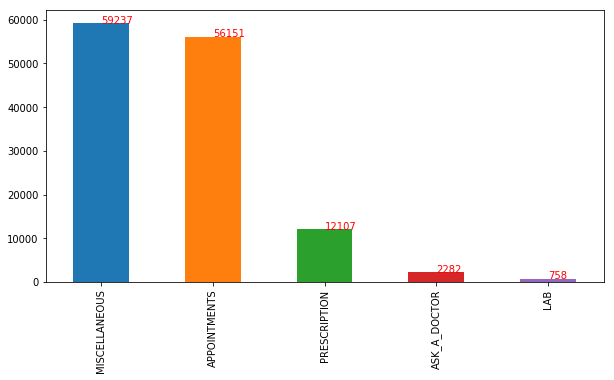

In [207]:
s=actual_data.Categories1.value_counts()
ax=s.plot.bar(figsize=(10,5))
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Categories1, v.Categories1, color='red')    

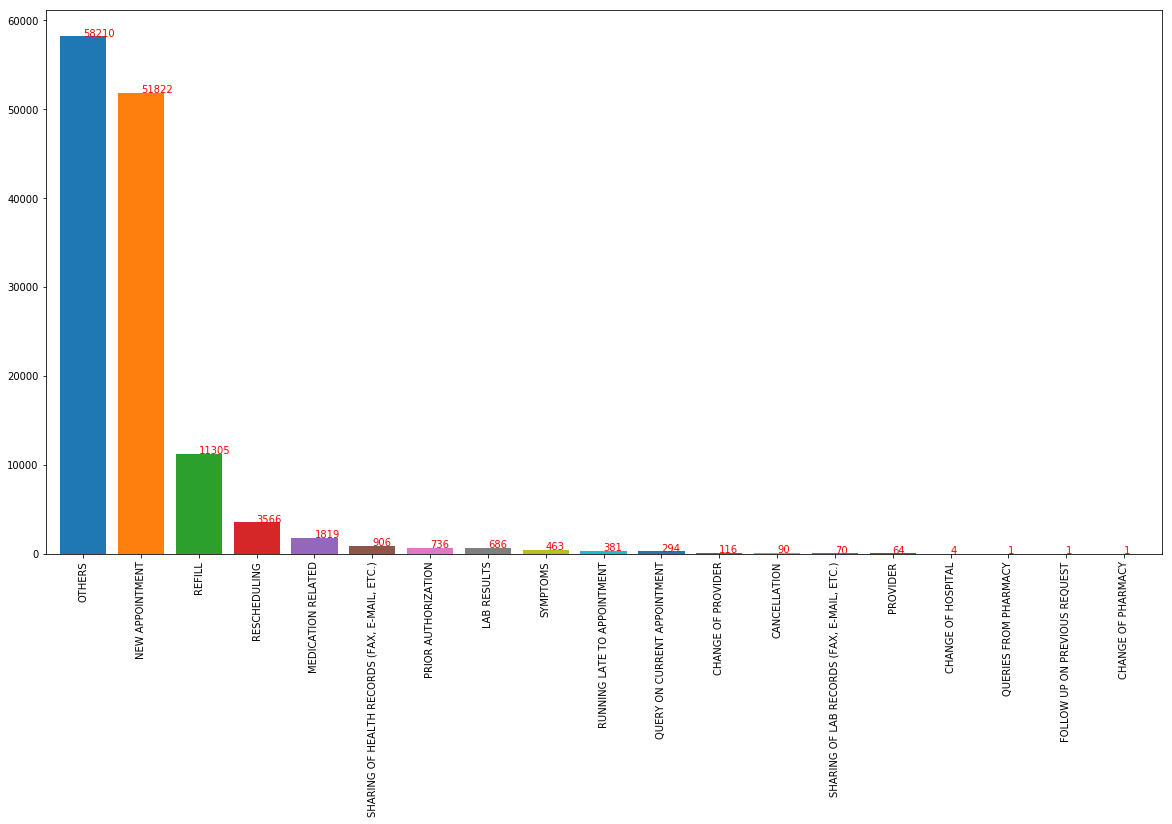

In [208]:
#ax = actual_data.groupby("Sub_categories1").size().plot(kind="bar",figsize=(20,10))
#print(actual_data.Sub_categories1.value_counts(),ax)
s=actual_data.Sub_categories1.value_counts()
ax=s.plot.bar(width=.8,figsize=(20,10))
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Sub_categories1, v.Sub_categories1, color='red')

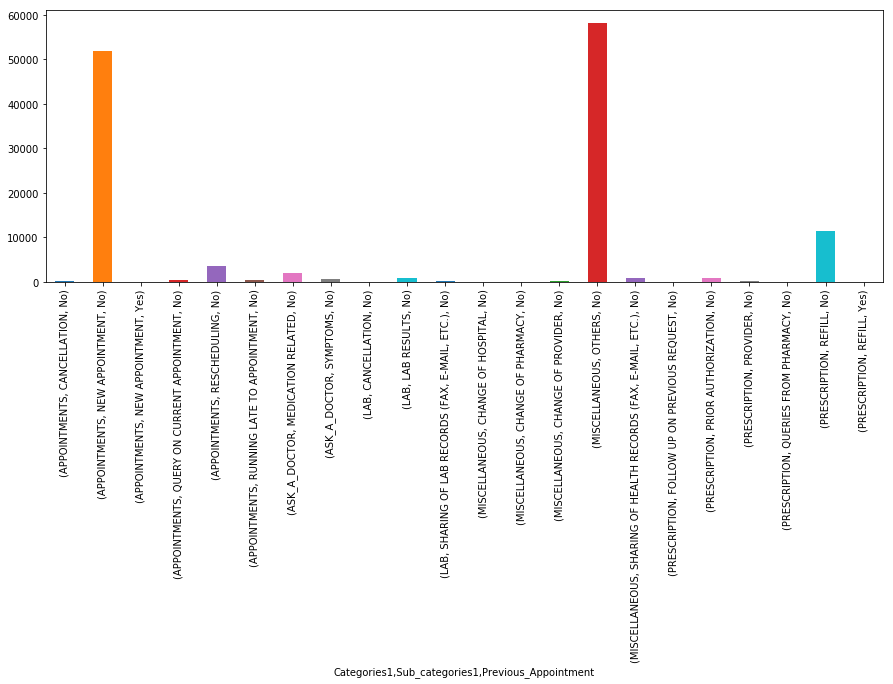

In [209]:
actual_data_ax = actual_data.groupby(["Categories1","Sub_categories1","Previous_Appointment"]).size().plot(kind="bar", figsize=(15, 5))

In [210]:
#Each word frequency count in Whole Corpus
freq_count_data = pd.Series(' '.join(actual_data['schedule_note'].astype(str)).split()).value_counts()
print(len(freq_count_data),freq_count_data.sum())

56143 927188


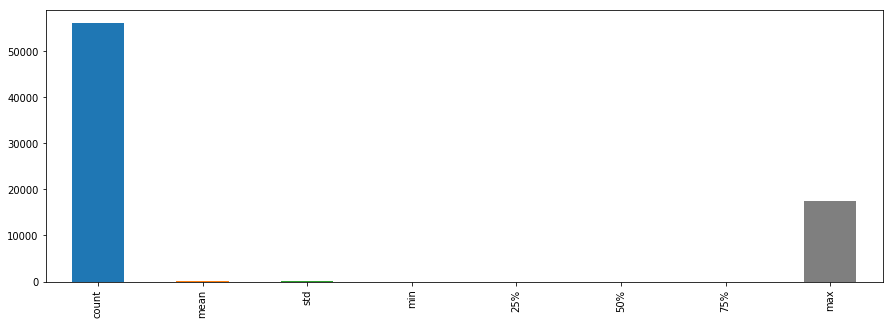

In [211]:
freq_count_data.describe().plot(kind="bar",figsize=(15, 5))

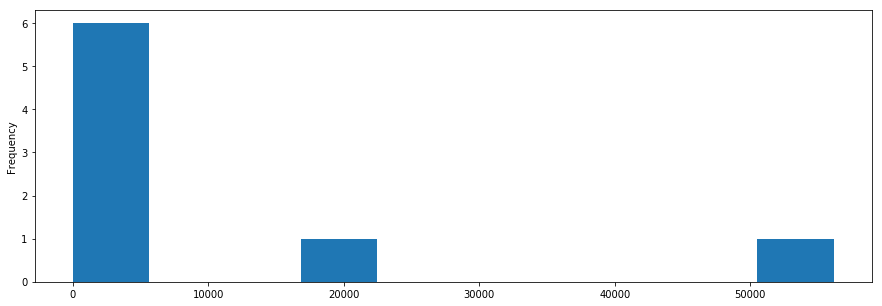

In [212]:
freq_count_data.describe().plot(kind="hist",figsize=(15, 5))

In [213]:
#############################################################################################################

In [214]:
def process_text(input_string):
    input_string=re.sub(r'[^a-zA-Z0-9\s]', '',input_string)
    sentence = nltk.tokenize.sent_tokenize(input_string)
    out = []
    for sent in sentence:
        wordTokens = nltk.tokenize.word_tokenize(sent)
        lower_tokens = [token.lower() for token in wordTokens]
        stop = stopwords.words('english')
        tokens = [token for token in lower_tokens if token not in stop]
        lmtzr = nltk.stem.WordNetLemmatizer()
        tokens = [lmtzr.lemmatize(token) for token in tokens]
        out.append(" ".join(tokens))
    return out

In [215]:
actual_data["schedule_note"]=actual_data["schedule_note"].astype("str")
test_data["schedule_note"]=test_data["schedule_note"].astype("str")

In [216]:
sentence=[]
for i in range (0,len(actual_data)):
        sentence.append(process_text(actual_data["schedule_note"][i]))

In [217]:
sentence_ts=[]
for i in range (0,len(test_data)):
        sentence_ts.append(process_text(test_data["schedule_note"][i]))

In [218]:
actual_data["sentence"]=pd.DataFrame(sentence)
test_data["sentence"]=pd.DataFrame(sentence_ts)

In [219]:
#Each word frequency count in Whole Corpus
freq_count_data = pd.Series(' '.join(actual_data['sentence'].astype(str)).split()).value_counts()
print(len(freq_count_data),freq_count_data.sum())

33592 755346


In [220]:
actual_data["sentence"]=actual_data["sentence"].astype('str')
actual_data["Categories1"]=actual_data["Categories1"].astype("category")
actual_data["Sub_categories1"]=actual_data["Sub_categories1"].astype("category")
test_data["sentence"]=test_data["sentence"].astype("str")
test_data["Categories1"]=test_data["Categories1"].astype("str")
test_data["Sub_categories1"]=test_data["Sub_categories1"].astype("str")

In [221]:
#########################################################################################################################

In [222]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(actual_data["sentence"], actual_data["Categories1"], test_size=0.2,random_state=42)

In [223]:
X_test_1=test_data["sentence"]
y_test_1=test_data["Categories1"]

In [224]:
tvec = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=200000)
x_train_tfidf = tvec.fit_transform(X_train_1)
x_validation_tfidf = tvec.transform(X_valid_1)
x_test_tfidf=tvec.transform(X_test_1)

In [225]:
clf = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
clf.fit(x_train_tfidf,y_train_1)
score1 = clf.score(x_train_tfidf,y_train_1)
score2 = clf.score(x_validation_tfidf, y_valid_1)
score3 = clf.score(x_test_tfidf,y_test_1)
print(clf.score(x_train_tfidf,y_train_1),clf.score(x_validation_tfidf, y_valid_1),clf.score(x_test_tfidf,y_test_1))

0.964741257134 0.897422147317 0.905981155264


In [226]:
ch2 = SelectKBest(chi2, k=120000)
x_train_chi2_selected = ch2.fit_transform(x_train_tfidf,y_train_1)
x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
x_test_chi2_selected=ch2.transform(x_test_tfidf)
clf2 = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
clf2.fit(x_train_chi2_selected, y_train_1)
score1_2 = clf2.score(x_train_chi2_selected,y_train_1)
score2_2 = clf2.score(x_validation_chi2_selected, y_valid_1)
score3_2 = clf2.score(x_test_chi2_selected,y_test_1)
print(score1_2,score2_2,score3_2)

0.95883288007 0.896694373157 0.904342482589


In [ ]:
##########################################################################################################################

In [227]:
pd.DataFrame(confusion_matrix(y_train_1,clf.predict(x_train_tfidf)),["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,43377,33,3,1299,132
ASK_A_DOCTOR,154,1548,5,115,19
LAB,19,0,508,63,0
MISCELLANEOUS,1320,63,36,45827,188
PRESCRIPTION,40,47,0,146,9486


In [228]:
print(classification_report(y_train_1,clf.predict(x_train_tfidf)))

               precision    recall  f1-score   support

 APPOINTMENTS       0.97      0.97      0.97     44844
 ASK_A_DOCTOR       0.92      0.84      0.88      1841
          LAB       0.92      0.86      0.89       590
MISCELLANEOUS       0.97      0.97      0.97     47434
 PRESCRIPTION       0.97      0.98      0.97      9719

  avg / total       0.96      0.96      0.96    104428



In [239]:
print(classification_report(y_train_1,clf.predict(x_train_tfidf)))

                                               precision    recall  f1-score   support

                                 CANCELLATION       1.00      0.94      0.97        67
                           CHANGE OF HOSPITAL       1.00      0.50      0.67         4
                           CHANGE OF PHARMACY       1.00      1.00      1.00         1
                           CHANGE OF PROVIDER       1.00      0.70      0.82        89
                FOLLOW UP ON PREVIOUS REQUEST       1.00      1.00      1.00         1
                                  LAB RESULTS       0.92      0.86      0.89       531
                           MEDICATION RELATED       0.90      0.81      0.86      1466
                              NEW APPOINTMENT       0.96      0.97      0.96     41391
                                       OTHERS       0.96      0.97      0.96     46602
                          PRIOR AUTHORIZATION       0.91      0.91      0.91       591
                                     PROVI

C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [229]:
pd.DataFrame(confusion_matrix(y_train_1,clf2.predict(x_train_chi2_selected)),["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"],["APPOINTMENTS","ASK_A_DOCTOR ","LAB","MISCELLANEOUS","PRESCRIPTION"])

,APPOINTMENTS,ASK_A_DOCTOR,LAB,MISCELLANEOUS,PRESCRIPTION
APPOINTMENTS,43022,34,3,1653,132
ASK_A_DOCTOR,154,1546,5,117,19
LAB,19,0,504,67,0
MISCELLANEOUS,1560,71,34,45577,192
PRESCRIPTION,42,47,0,150,9480


In [186]:
print(classification_report(y_train_1,clf2.predict(x_train_chi2_selected)))

               precision    recall  f1-score   support

 APPOINTMENTS       0.95      0.95      0.95     44844
 ASK_A_DOCTOR       0.92      0.82      0.87      1841
          LAB       0.92      0.85      0.88       590
MISCELLANEOUS       0.95      0.96      0.95     47434
 PRESCRIPTION       0.96      0.97      0.97      9719

  avg / total       0.95      0.95      0.95    104428



In [ ]:
#######################################################################################################################

In [230]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(actual_data["sentence"], actual_data["Sub_categories1"], test_size=0.2,random_state=42)

In [231]:
X_test_1=test_data["sentence"]
y_test_1=test_data["Sub_categories1"]

In [232]:
tvec = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=200000)
x_train_tfidf = tvec.fit_transform(X_train_1)
x_validation_tfidf = tvec.transform(X_valid_1)
x_test_tfidf=tvec.transform(X_test_1)

In [238]:
clf = LinearSVC(C=1.0,penalty='l2', max_iter=10000,multi_class='ovr',dual=True)
#clf = linear_model.LogisticRegression(n_jobs=-1,C=4.0,multi_class='ovr',max_iter=3000, penalty='l2')
clf.fit(x_train_tfidf,y_train_1)
score1 = clf.score(x_train_tfidf,y_train_1)
score2 = clf.score(x_validation_tfidf, y_valid_1)
score3 = clf.score(x_test_tfidf,y_test_1)
print(clf.score(x_train_tfidf,y_train_1),clf.score(x_validation_tfidf, y_valid_1),clf.score(x_test_tfidf,y_test_1))

0.963103765274 0.884322212433 0.891437935272


In [234]:
print(classification_report(y_train_1,clf.predict(x_train_tfidf)))
pd.DataFrame(confusion_matrix(y_train_1,clf.predict(x_train_tfidf)),["CANCELLATION","CHANGE OF HOSPITAL","CHANGE OF PHARMACY ","CHANGE OF PROVIDER","FOLLOW UP ON PREVIOUS REQUEST","LAB RESULTS","MEDICATION RELATED","NEW APPOINTMENT","OTHERS","PRIOR AUTHORIZATION","PROVIDER","QUERIES FROM PHARMACY","QUERY ON CURRENT APPOINTMENT","REFILL","RESCHEDULING","RUNNING LATE TO APPOINTMENT","SHARING OF HEALTH RECORDS","SHARING OF LAB RECORDS","SYMPTOMS"],["CANCELLATION","CHANGE OF HOSPITAL","CHANGE OF PHARMACY ","CHANGE OF PROVIDER","FOLLOW UP ON PREVIOUS REQUEST","LAB RESULTS","MEDICATION RELATED","NEW APPOINTMENT","OTHERS","PRIOR AUTHORIZATION","PROVIDER","QUERIES FROM PHARMACY","QUERY ON CURRENT APPOINTMENT","REFILL","RESCHEDULING","RUNNING LATE TO APPOINTMENT","SHARING OF HEALTH RECORDS","SHARING OF LAB RECORDS","SYMPTOMS"])

C:\Users\1520\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                               precision    recall  f1-score   support

                                 CANCELLATION       1.00      0.94      0.97        67
                           CHANGE OF HOSPITAL       1.00      0.50      0.67         4
                           CHANGE OF PHARMACY       1.00      1.00      1.00         1
                           CHANGE OF PROVIDER       1.00      0.70      0.82        89
                FOLLOW UP ON PREVIOUS REQUEST       1.00      1.00      1.00         1
                                  LAB RESULTS       0.92      0.86      0.89       531
                           MEDICATION RELATED       0.90      0.81      0.86      1466
                              NEW APPOINTMENT       0.96      0.97      0.96     41391
                                       OTHERS       0.96      0.97      0.96     46602
                          PRIOR AUTHORIZATION       0.91      0.91      0.91       591
                                     PROVI

,CANCELLATION,CHANGE OF HOSPITAL,CHANGE OF PHARMACY,CHANGE OF PROVIDER,FOLLOW UP ON PREVIOUS REQUEST,LAB RESULTS,MEDICATION RELATED,NEW APPOINTMENT,OTHERS,PRIOR AUTHORIZATION,PROVIDER,QUERIES FROM PHARMACY,QUERY ON CURRENT APPOINTMENT,REFILL,RESCHEDULING,RUNNING LATE TO APPOINTMENT,SHARING OF HEALTH RECORDS,SHARING OF LAB RECORDS,SYMPTOMS
CANCELLATION,63,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0
CHANGE OF HOSPITAL,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
CHANGE OF PHARMACY,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHANGE OF PROVIDER,0,0,0,62,0,0,0,2,25,0,0,0,0,0,0,0,0,0,0
FOLLOW UP ON PREVIOUS REQUEST,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LAB RESULTS,0,0,0,0,0,456,0,19,56,0,0,0,0,0,0,0,0,0,0
MEDICATION RELATED,0,0,0,0,0,6,1192,143,100,0,0,0,0,18,0,0,1,0,6
NEW APPOINTMENT,0,0,0,0,0,2,18,39981,1242,2,0,0,0,129,12,1,3,0,1
OTHERS,0,0,0,0,0,32,59,1274,44999,46,0,0,1,139,19,3,21,6,3
PRIOR AUTHORIZATION,0,0,0,0,0,0,0,3,49,536,0,0,0,3,0,0,0,0,0
